In [97]:
# %pip install pyalex 
%pip install japanize-matplotlib

import pandas as pd
from pyalex import Works, Authors, Sources, Institutions, Concepts, Funders
import pyalex
import matplotlib.pyplot as plt
import math
import numpy as np
import util
import japanize_matplotlib

# pyalex.config.email = "your@email.address"
pyalex.config.email = "zhmuler@gmail.com"


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Open Alex 総採録数
print(f"OpenAlexに収録されている論文数は　{Works().count():,}　件")
print(f"研究者数は　{Authors().count():,}　件")
print(f"機関数は　{Institutions().count():,}　件")
print(f"雑誌数は　{Sources().count():,}　件")
print(f"出資機関数　{Funders().count():,}　件")
print(f"Topic数は　{Concepts().count():,}　")


OpenAlexに収録されている論文数は　249,073,214　件
研究者数は　90,297,296　件
機関数は　107,447　件
雑誌数は　251,627　件
出資機関数　32,437　件
Topic数は　65,073　


# 論文のデータ

In [129]:
year_range = range(1950, 2024)

In [130]:
num_publish = [Works().filter(publication_year=i).select(["id"]).count() for i in year_range] # 2023年までに発行された論文を取得
# num_publish_gold = [Works().filter(publication_year=i, oa_status='gold').count() for i in year_range]
# num_publish_green = [Works().filter(publication_year=i, oa_status='green').count() for i in year_range]

In [132]:
authors =pd.read_pickle("./supplementary/career_age.pickle")

authors_share = np.array([len(authors[authors["year"]<i]) for i in year_range])/len(authors)
authors_count = pd.DataFrame(authors_share*Authors().count(), columns=["count"],index=year_range).rename_axis("year")

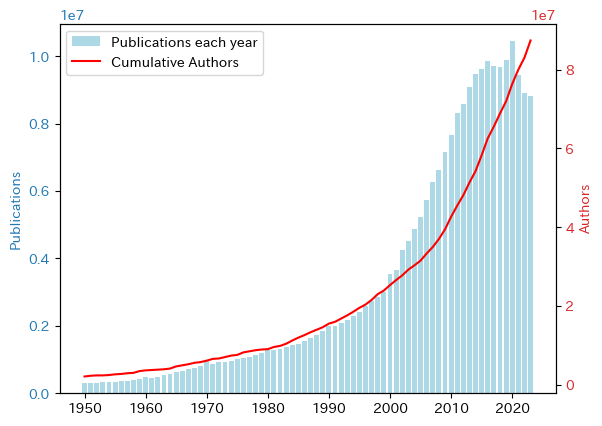

In [133]:
x = np.arange(year_range[0], year_range[-1]+1)

# プロット
fig, ax1 = plt.subplots()

# 左の軸にプロット
color = 'tab:blue'
ax1.set_ylabel('Publications', color=color)
bar_width=0.8
ax1.bar(x, num_publish, width=bar_width, color='lightblue', label='Publications each year')
# ax1.bar(x, num_publish_gold, width=bar_width, color='y', label='Gold OA')
# ax1.bar(x, num_publish_green, width=bar_width, color='g', label='Green OA', bottom=num_publish_gold)
ax1.tick_params(axis='y', labelcolor=color)

# 右の軸にプロット
ax2 = ax1.twinx() 
color = 'tab:red'
ax2.set_ylabel('Authors', color=color)
ax2.plot(x, authors_share*Authors().count(), color='r', label='Cumulative Authors')
ax2.tick_params(axis='y', labelcolor=color)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

In [2]:
# 分野ごと論文数(1970と2010を比較)
fields = pd.read_csv("./supplementary/domain_field_mapping.csv").set_index("field_id")
for i in range(11,37):
    fields.loc[i,"n_1970"] = Works().filter(publication_year= 1970, primary_topic={"field":{"id":i}}).count()
    fields.loc[i,"n_2020"] = Works().filter(publication_year= 2020, primary_topic={"field":{"id":i}}).count()
fields.sort_values(by="domain_id")

,field_name,domain_id,domain_name,n_1970,n_2020
field_id,,,,,
11,Agricultural and Biological Sciences,1,Life Sciences,71742.0,406350.0
13,"Biochemistry, Genetics and Molecular Biology",1,Life Sciences,53934.0,428911.0
30,"Pharmacology, Toxicology and Pharmaceutics",1,Life Sciences,5399.0,27796.0
28,Neuroscience,1,Life Sciences,11680.0,120943.0
24,Immunology and Microbiology,1,Life Sciences,8025.0,74843.0
12,Arts and Humanities,2,Social Sciences,54828.0,505652.0
14,"Business, Management and Accounting",2,Social Sciences,9865.0,305348.0
33,Social Sciences,2,Social Sciences,96575.0,1581409.0
32,Psychology,2,Social Sciences,17565.0,278905.0


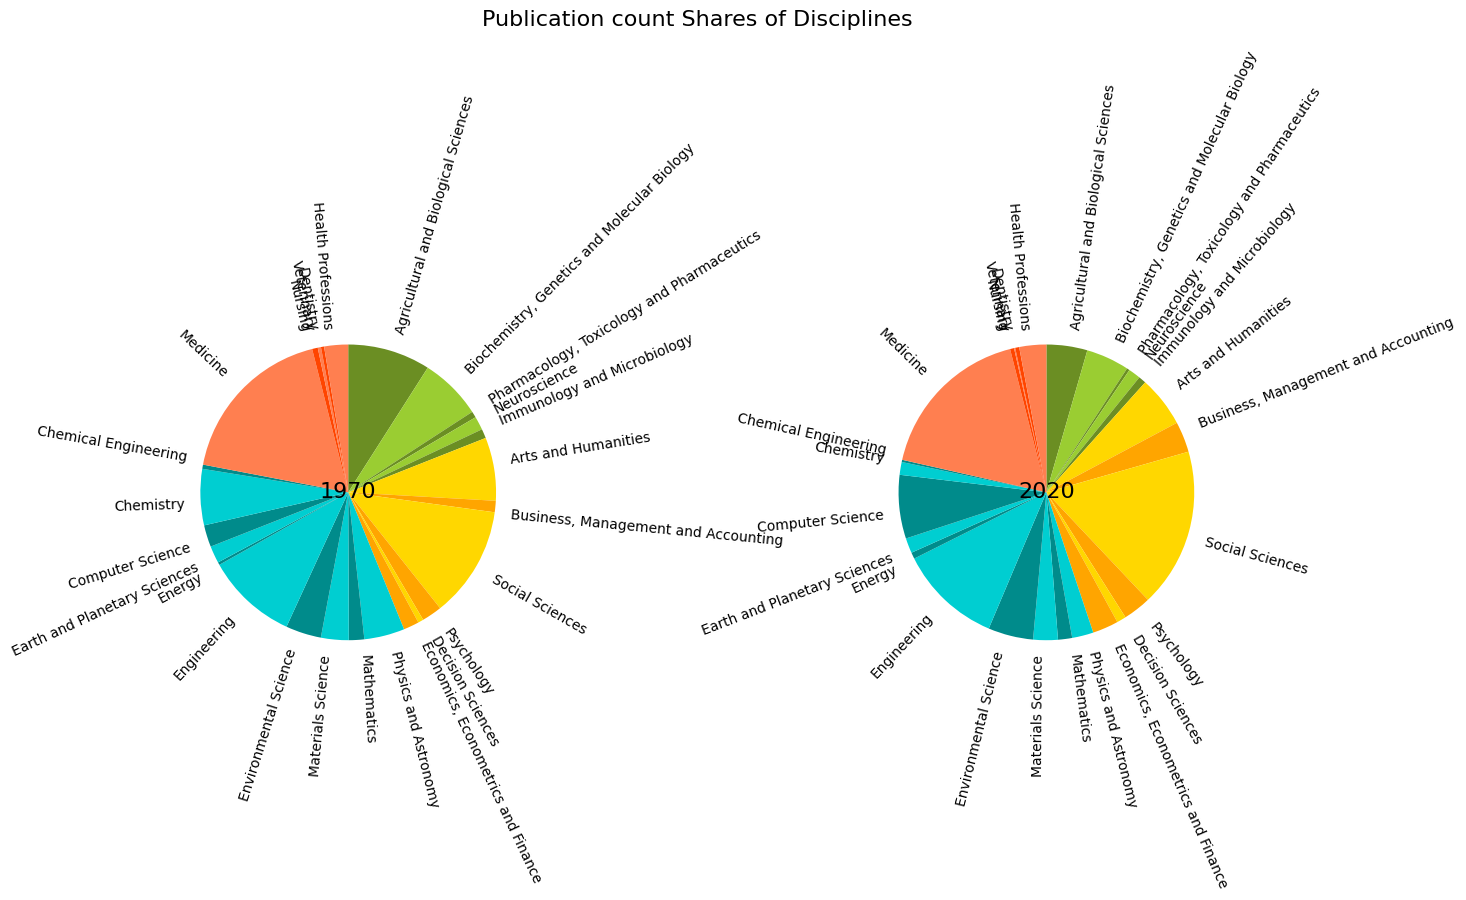

In [26]:
import matplotlib.pyplot as plt

# データ
fields_sorted = fields.sort_values(by="domain_id")

labels = fields_sorted["field_name"]
sizes = fields_sorted["n_1970"]/fields_sorted["n_1970"].sum()
sizes_2010 = fields_sorted["n_2020"]/fields_sorted["n_2020"].sum()

labels =  fields_sorted["field_name"]

#色リストの作成
colors_list = []

# 大分類ごとの色を定義
dark_colors = ['olivedrab','orange' ,'darkcyan', 'orangered'] 
light_colors = [ 'yellowgreen', 'gold','darkturquoise','coral']

# 大分類ごとに交互の色を割り当てる
for i,d in enumerate(fields_sorted["domain_id"]):
    if(i%2==0):colors_list.append(dark_colors[d-1])
    if(i%2==1):colors_list.append(light_colors[d-1])

fig,ax =plt.subplots(1,2)
ax[0].pie(sizes, labels=labels, colors=colors_list,  startangle=90, rotatelabels=True,counterclock=False)
ax[1].pie(sizes_2010, labels=labels, colors=colors_list,  startangle=90, rotatelabels=True,counterclock=False)
ax[0].text(0, 0, '1970', fontsize=16, ha='center', va='center')
ax[1].text(0, 0, '2020', fontsize=16, ha='center', va='center')


plt.subplots_adjust(left=0,right=2)
plt.suptitle("Publication count Shares of Disciplines",x=1.0,y=1.5,fontsize=16)
plt.show()

#円グラフの大きさを変える


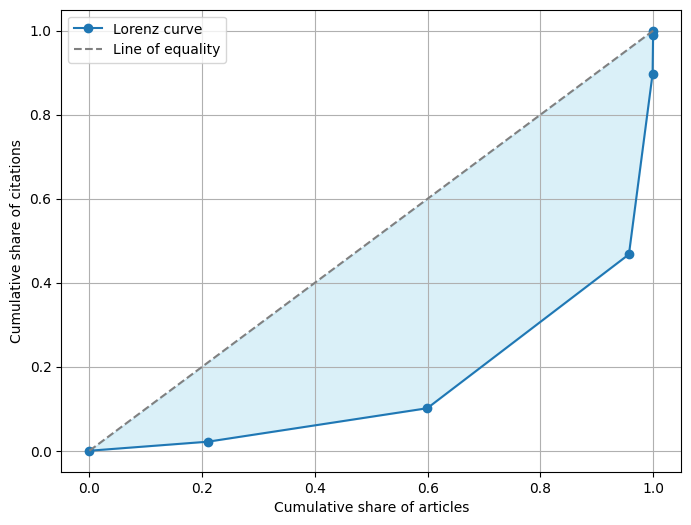

Gini 係数: 0.6852


In [110]:
import numpy as np
import matplotlib.pyplot as plt

# 被引用数の偏り（Gini 係数）
cite_step = [1,2,10,100,1000,10000]
papers_cited = [Works().filter(cited_by_count=f"<{i}").count() for i in cite_step]+[Works().count()] #CDF
papers_cited_jp = [Works().filter(cited_by_count=f"<{i}", ).count() for i in cite_step]+[Works().count()] #CDF

# 引用数と対応する論文数
paper_counts = np.array(papers_cited[1:]) - np.array(papers_cited[:-1]) #PDF
citation_counts = paper_counts*np.array(cite_step)*0.3

# 引用数と論文数の累積分布関数（CDF）を計算
x_cumulative = [0 ]+list(np.cumsum(paper_counts) / np.sum(paper_counts))
y_cumulative = [0 ]+list(np.cumsum(citation_counts) / np.sum(citation_counts))

perfect_equality = np.linspace(0, 1, len(citation_counts))

# ローレンツ曲線の描画
fig, ax = plt.subplots(figsize=(8, 6))

plt.plot(x_cumulative, y_cumulative, label='Lorenz curve', marker='o')
plt.plot([0, 1], [0, 1], '--',color='gray', label='Line of equality')
plt.fill_between(x_cumulative, y_cumulative, x_cumulative, color='skyblue', alpha=0.3)
plt.xlabel('Cumulative share of articles')
plt.ylabel('Cumulative share of citations')
plt.legend()
plt.grid(True)
plt.show()

# Gini係数の計算
gini_index = 1 - 2 * np.trapz(y_cumulative, x=x_cumulative)
print('Gini 係数:', f"{gini_index:.4}")
# 国ごとに科学政策の良し悪しとgini係数
# 何を読み取るのか。格差があるというだけでは思考が深まらない。日本国内とか分野べつ

# 論文誌のデータ

In [3]:
source = Sources().filter(works_count=">1000000").get() # 100万本以上論文が出ている論文誌を取得
print("100万本以上論文が出ている論文誌")
pd.DataFrame(map(lambda x: [x["display_name"], x["host_organization_name"], x["is_oa"],f'{x["works_count"]:,}'],source),
            columns=["論文誌名","論文誌発行機関","OA誌かどうか", "累計論文発行数"])


100万本以上論文が出ている論文誌


,論文誌名,論文誌発行機関,OA誌かどうか,累計論文発行数
0,PubMed,National Institutes of Health,False,"33,075,864"
1,PubMed Central,National Institutes of Health,True,"8,009,760"
2,Europe PMC (PubMed Central),European Bioinformatics Institute,True,"5,316,266"
3,arXiv (Cornell University),Cornell University,True,"3,015,170"
4,DOAJ (DOAJ: Directory of Open Access Journals),None,True,"2,672,478"
5,HAL (Le Centre pour la Communication Scientifi...,French National Centre for Scientific Research,True,"2,571,027"
6,Springer eBooks,Springer Nature,False,"2,519,831"
7,Zenodo (CERN European Organization for Nuclear...,European Organization for Nuclear Research,True,"1,405,433"
8,RePEc: Research Papers in Economics,Federal Reserve Bank of St. Louis,True,"1,126,422"
9,Social Science Research Network,RELX Group (Netherlands),False,"1,079,692"


In [4]:
journals = pd.DataFrame(util.getAll(\
    Sources().filter(apc_usd=">0")\
        .select(["id","display_name","summary_stats","apc_usd","works_count","country_code"])))

50it [00:56,  1.12s/it]


In [5]:
journals["country_code"].unique()

array(['CH', 'NL', 'GB', 'US', 'AU', 'DE', None, 'DK', 'IE', 'FR', 'HU',
       'JP', 'CA', 'CZ', 'RU', 'IT', 'AT', 'SG', 'BE', 'IN', 'KR', 'CN',
       'ES', 'BR', 'NZ', 'UG', 'UA', 'IR', 'RO', 'TW', 'ZA', 'BG', 'LT',
       'RS', 'SE', 'IL', 'HK', 'EG', 'SK', 'PL', 'ID', 'PK', 'NG', 'SA',
       'CL', 'FI', 'IQ', 'MX', 'HR', 'TR', 'EE', 'NP', 'GR', 'KE', 'MY',
       'AR', 'CO', 'PT', 'BA', 'SI', 'LV', 'NO', 'PH', 'MO', 'TH', 'BD',
       'ME', 'LY', 'KW', 'VN', 'PE', 'LB', 'CY', 'MK', 'AE', 'KG', 'MN',
       'AL', 'QA', 'KZ', 'GH', 'BY'], dtype=object)

In [94]:
prestigous_jounals = ["Nature","Nature Physics","PLOS ONE","Scientific Reports","Physical Review Letters","PubMed","Cell","eLife","Science China Technological Sciences","The Journal of Biochemistry"]
prestigous_jounals_shortname = ["Nature","Nature Physics","PLOS ONE","Sci.Rep.","PRL","PubMed","Cell","eLife","SCTS","日本生化学会"]
colors = {'Europe':'turquoise', 'NorthAmerica':'navy', 'Oceania':'orange', 'SouthAmerica':'gold','Africa':'peru','Asia':'deeppink',  "na":"grey"}

sorted = journals.sort_values(by="works_count",ascending=True)

continent = pd.read_csv("./supplementary/countrycode_continent.csv")\
    .drop("country_name",axis="columns")\
    .set_index("country_code")
sorted = pd.merge(sorted, continent, how="left", on="country_code")
sorted["continent"].fillna("na",inplace=True)

sorted["h-index"] = sorted["summary_stats"].apply(lambda x: x["h_index"])
sorted["2yr_mean_citedness"] = sorted["summary_stats"].apply(lambda x: x["2yr_mean_citedness"])
sorted["color"] = sorted["continent"].apply(lambda x: colors[x])
# print(sorted[sorted["display_name"]=="eLife"])
label_index = []
for i in range(len(prestigous_jounals)):
    index = sorted[sorted["display_name"]==prestigous_jounals[i]].index
    if(len(index)>0):
        label_index.append(index[0])
    else:
        label_index.append(None)
        prestigous_jounals[i] = ""
        prestigous_jounals_shortname[i] = ""


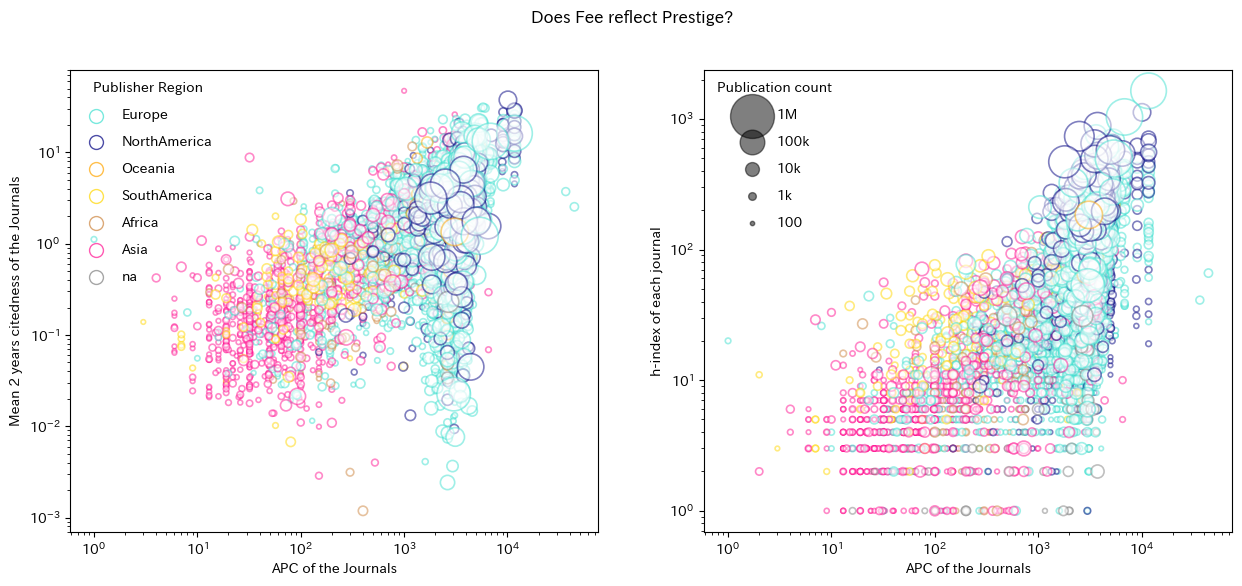

In [100]:
fig,ax = plt.subplots(1,2,figsize=(15,6))

ax[0].scatter(sorted["apc_usd"],sorted["2yr_mean_citedness"],s=sorted["works_count"].apply(lambda x: math.sqrt(x)),c="white", edgecolors=sorted["color"],linewidth=1.2,alpha=0.5)
ax[0].set_ylabel("Mean 2 years citedness of the Journals")
ax[1].scatter(sorted["apc_usd"],sorted["h-index"],s=sorted["works_count"].apply(lambda x: math.sqrt(x)),c="white", edgecolors=sorted["color"],linewidth=1.2,alpha=0.5)
ax[1].set_ylabel("h-index of each journal")

for axes in ax:
    axes.set_xscale('log')
    axes.set_yscale('log')
    axes.set_xlabel("APC of the Journals")

# Custom legend for bubble sizes
legend_color = colors.values()
legend_labels_color = colors.keys()
for color, label in zip(legend_color, legend_labels_color):
    ax[0].scatter([], [], s=100, label=label, color='white',edgecolors=color, alpha=0.7)

legend_sizes = [1000, 316, 100, 31, 10]
legend_labels = ['1M', '100k','10k', '1k', '100']
for size, label in zip(legend_sizes, legend_labels):
    ax[1].scatter([], [], s=size, label=label, color='black', alpha=0.5)
ax[0].legend(scatterpoints=1, frameon=False, labelspacing=1, title='Publisher Region')
ax[1].legend(scatterpoints=1, frameon=False, labelspacing=1, title='Publication count')

plt.suptitle("Does Fee reflect Prestige?")
plt.show()

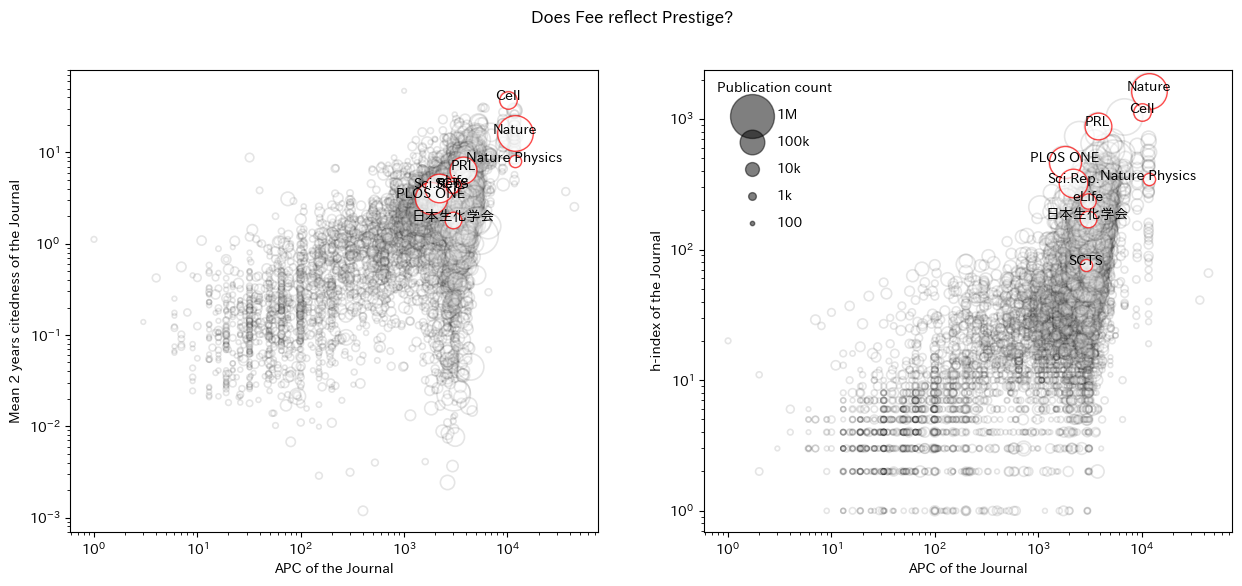

In [114]:
fig,ax = plt.subplots(1,2,figsize=(15,6))

ax[0].scatter(sorted["apc_usd"],sorted["2yr_mean_citedness"],s=sorted["works_count"].apply(lambda x: math.sqrt(x)),c="white", edgecolors='black',linewidth=1.2,alpha=0.1)
ax[0].set_ylabel("Mean 2 years citedness of the Journal")
ax[1].scatter(sorted["apc_usd"],sorted["h-index"],s=sorted["works_count"].apply(lambda x: math.sqrt(x)),c="white", edgecolors='black',linewidth=1.2,alpha=0.1)
ax[1].set_ylabel("h-index of the Journal")

for i,l in enumerate(label_index):
    label = prestigous_jounals_shortname[i]
    if(label!=""):
        x=sorted.loc[l,"apc_usd"]
        size= math.sqrt(sorted.loc[l,"works_count"])
        y1=sorted.loc[l,"2yr_mean_citedness"]
        y2=sorted.loc[l,"h-index"]
        ax[0].annotate(label, (x, y1), textcoords="offset points", xytext=(0,0), ha='center')
        ax[1].annotate(label, (x, y2), textcoords="offset points", xytext=(0,0), ha='center')
        ax[0].scatter(x, y1,c="white",s=size,edgecolors="red",alpha=0.7)
        ax[1].scatter(x, y2,c="white",s=size,edgecolors="red",alpha=0.7)
    
for axes in ax:
    axes.set_xscale('log')
    axes.set_yscale('log')
    axes.set_xlabel("APC of the Journal")

# Custom legend for bubble sizes
legend_sizes = [1000, 316, 100, 31, 10]
legend_labels = ['1M', '100k','10k', '1k', '100']
for size, label in zip(legend_sizes, legend_labels):
    plt.scatter([], [], s=size, label=label, color='black', alpha=0.5)

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Publication count')

plt.suptitle("Does Fee reflect Prestige?")
plt.show()

# 機関データ

In [132]:
# Institutions
institution = Institutions().filter(country_code="JP").sort(summary_stats={"h-index":"desc"}).get()

pd.DataFrame(map(lambda x: [x["display_name"], x["summary_stats"]["h_index"],x["id"]],institution),
            columns=["機関名","h-index","id"]).head(10)

,機関名,h-index,id
0,The University of Tokyo,727,https://openalex.org/I74801974
1,Kyoto University,646,https://openalex.org/I22299242
2,Osaka University,598,https://openalex.org/I98285908
3,Japan Science and Technology Agency,544,https://openalex.org/I4210086780
4,Tohoku University,493,https://openalex.org/I201537933
5,Nagoya University,436,https://openalex.org/I60134161
6,Kyushu University,420,https://openalex.org/I135598925
7,National Institute of Advanced Industrial Scie...,392,https://openalex.org/I73613424
8,Tokyo Institute of Technology,391,https://openalex.org/I114531698
9,Tokyo University of Science,389,https://openalex.org/I161296585


In [133]:
institution = Institutions().filter(country_code="JP").sort(summary_stats={"2yr_mean_citedness":"desc"}).get()
pd.DataFrame(map(lambda x: [x["display_name"], x["summary_stats"]["2yr_mean_citedness"],x["id"]],institution),
            columns=["機関名","2年間平均被引用数","id"]).head(10)

,機関名,2年間平均被引用数,id
0,Chiba Prefectural Center Museum Otone Branch,69.000000,https://openalex.org/I4210105858
1,BioBank Japan,34.666667,https://openalex.org/I4210100911
2,Tomita Hospital,23.333333,https://openalex.org/I4210112518
3,Institute of Applied Energy,20.454545,https://openalex.org/I4210147409
4,Kyushu Economic Research Center,19.500000,https://openalex.org/I4210090332
5,Japan Chemical Industry Association,16.428571,https://openalex.org/I4210120656
6,Toyama University of International Studies,15.500000,https://openalex.org/I76257533
7,Katsumata Hospital,15.500000,https://openalex.org/I4210143263
8,Mitsukoshi Health and Welfare Foundation,15.200000,https://openalex.org/I4210159217
9,Nippon Soda (Japan),14.076923,https://openalex.org/I34165663


In [168]:
institution_id = "https://openalex.org/i125602781" # 医科歯科

rca_fields = pd.read_csv("./supplementary/domain_field_mapping.csv").set_index("field_id")
print(rca_fields)
for i in range(11,37):
    pyalexObj = Works().filter(institution={"id":institution_id}, from_publication_date="2010-01-01",to_publication_date="2014-12-31",cited_by_count=">0",primary_topic={"field":{"id":i}})
    rca_fields.loc[i, "count"] = pyalexObj.count()
    if rca_fields.loc[i, "count"]>20:
        citation_counts = pd.DataFrame(util.getAll(pyalexObj.select(["cited_by_count"])))
        rca_fields.loc[i, "c_avg"] = citation_counts["cited_by_count"].mean()

7it [00:07,  1.06s/it]
2it [00:01,  1.06it/s]
3it [00:03,  1.10s/it]
2it [00:01,  1.03it/s]
3it [00:02,  1.02it/s]
2it [00:02,  1.04s/it]
14it [00:15,  1.09s/it]
3it [00:03,  1.06s/it]
2it [00:01,  1.13it/s]
2it [00:01,  1.06it/s]
2it [00:01,  1.03it/s]
3it [00:02,  1.06it/s]
2it [00:01,  1.05it/s]


In [174]:
fields_base = pd.read_pickle("./supplementary/fields_base_10k_global.pickle")
rca = pd.merge(rca_fields.dropna(), fields_base,how="left", on="field_id")

In [175]:
rca

,field_name,domain_id_x,domain_name,count_x,c_avg_x,domain_id_y,count_y,c_avg_y
field_id,,,,,,,,
13,"Biochemistry, Genetics and Molecular Biology",1,Life Sciences,1072.0,44.151119,1,903690.0,45.9705
16,Chemistry,3,Physical Sciences,59.0,26.355932,3,313017.0,30.7675
22,Engineering,3,Physical Sciences,228.0,24.201754,3,1813400.0,20.2236
23,Environmental Science,3,Physical Sciences,22.0,31.363636,3,616556.0,28.3189
24,Immunology and Microbiology,1,Life Sciences,295.0,56.840678,1,160433.0,39.8858
25,Materials Science,3,Physical Sciences,95.0,24.557895,3,559363.0,36.1275
27,Medicine,4,Health Sciences,2481.0,42.374043,4,2545100.0,29.0193
28,Neuroscience,1,Life Sciences,264.0,40.549242,1,268021.0,40.4706
29,Nursing,4,Health Sciences,23.0,30.782609,4,65560.0,27.7706


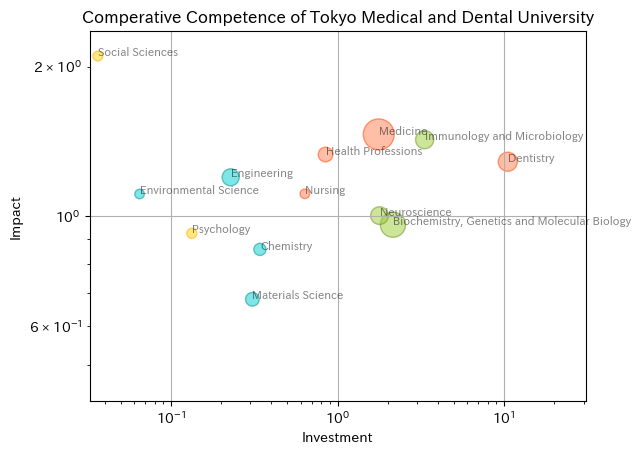

In [176]:
investment = (rca["count_x"]/rca["count_x"].mean()) / (rca["count_y"]/rca["count_y"].mean())
impact = rca["c_avg_x"]/rca["c_avg_y"]

x_range = max(math.log10(max(investment)), -math.log10(min(investment)))
y_range = max(math.log10(max(impact)), -math.log10(min(impact)))

light_colors = [ 'yellowgreen', 'gold','darkturquoise','coral']
dark_colors = ['olivedrab','orange' ,'darkcyan', 'orangered'] 

colors = rca["domain_id_x"].apply(lambda x: light_colors[x-1])
edgecolors = rca["domain_id_x"].apply(lambda x: dark_colors[x-1])

plt.scatter(investment,impact,s=rca["count_x"].apply(lambda x: math.sqrt(x)*10),c=colors,edgecolors=edgecolors, alpha=0.5)
labels = rca["field_name"]
title = Institutions()[f'{institution_id.split(sep="/")[-1]}']["display_name"]
for i, txt in enumerate(labels):
    plt.text(investment.iloc[i], impact.iloc[i], txt, fontsize=8,alpha=0.5)

plt.xscale("log")
plt.yscale("log")
plt.title(f"Comperative Competence of {title}")
plt.xlabel("Investment")
plt.xlim(10**(-x_range-0.05),10**(x_range+0.05))
plt.ylim(10**(-y_range-0.05),10**(y_range+0.05))
plt.ylabel("Impact")
plt.grid(True)